<a href="https://colab.research.google.com/github/ElzodQurashev/DS-AI_praktikum/blob/DS_portfolio/Amaliyot_Simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Amaliyot. Simple Linear Regression

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish: 
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


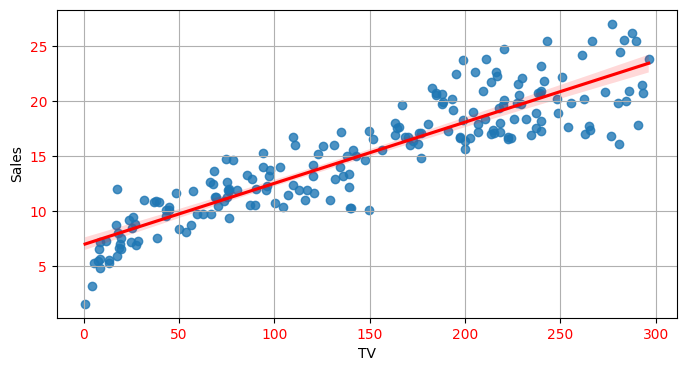

In [17]:
plt.figure(figsize = (8, 4))
sns.regplot(data= df, x= "TV", y= "Sales", line_kws= ({'color' : 'red'}))
plt.xticks(color = 'red')
plt.yticks(color = 'red')
plt.grid()
plt.show()

# ***Model***

In [20]:
train_set,  test_set = train_test_split( df, test_size= 10, random_state= 1 )

In [26]:
X_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# TRain
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# theta1, theta0
theta1= lr_model.coef_[0][0]
theta0= lr_model.intercept_[0]

print(f"{theta1= }")
print(f"{theta0= }")


theta1= 0.055566919704758085
theta0= 6.963621229731167


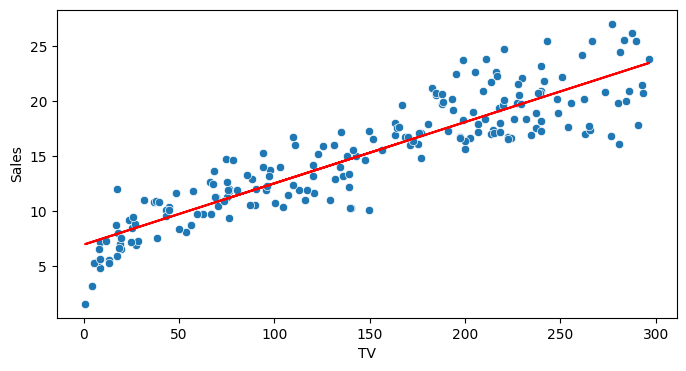

In [30]:
plt.figure(figsize= (8, 4))
sns.scatterplot(data= df, x= 'TV', y= 'Sales')
plt.plot(X_train, theta1 * X_train + theta0, '-r')
plt.show()

# ***Test***

In [31]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [32]:
y_predict = lr_model.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print(f'{mae= }')
print(f"{mse= }")

mae= 2.006930990088316
mse=6.124792848126263


In [42]:
qoldiq, butun = np.modf(y_predict)

In [43]:
test_set['prediction'] = butun
test_set

,TV,Radio,Newspaper,Sales,prediction
58,210.8,49.6,37.7,23.8,18.0
40,202.5,22.3,31.6,16.6,18.0
34,95.7,1.4,7.4,11.9,12.0
102,280.2,10.1,21.4,19.8,22.0
184,253.8,21.3,30.0,17.6,21.0
198,283.6,42.0,66.2,25.5,22.0
95,163.3,31.6,52.9,16.9,16.0
4,180.8,10.8,58.4,17.9,17.0
29,70.6,16.0,40.8,10.5,10.0
168,215.4,23.6,57.6,17.1,18.0
